In [55]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [56]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [57]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [58]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [59]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [60]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [61]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [62]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [63]:
# Find the most recent date in the data set.
recentdate = (session.query(Measurement.date)
                     .order_by(Measurement.date.desc())
                     .first())

recentdate

('2017-08-23',)

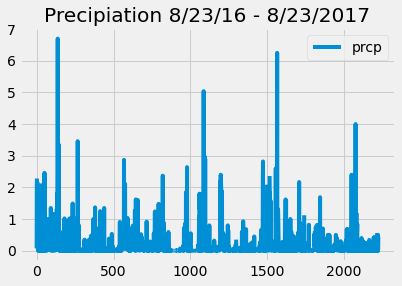

In [64]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_from_last_date = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp_score = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > one_year_from_last_date).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_score, columns=['date', 'prcp'])
prcp_df.head()

# Sort the dataframe by date
prcp_df.set_index('date').head()

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(title="Precipiation 8/23/16 - 8/23/2017")


In [65]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [66]:
# Design a query to calculate the total number stations in the dataset
num_stations = session.query(Station).count()
num_stations

9

In [76]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [82]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]
session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                filter(Measurement.station == most_active_station).all()

[(54.0, 71.66378066378067, 85.0)]

<function matplotlib.pyplot.show(*args, **kw)>

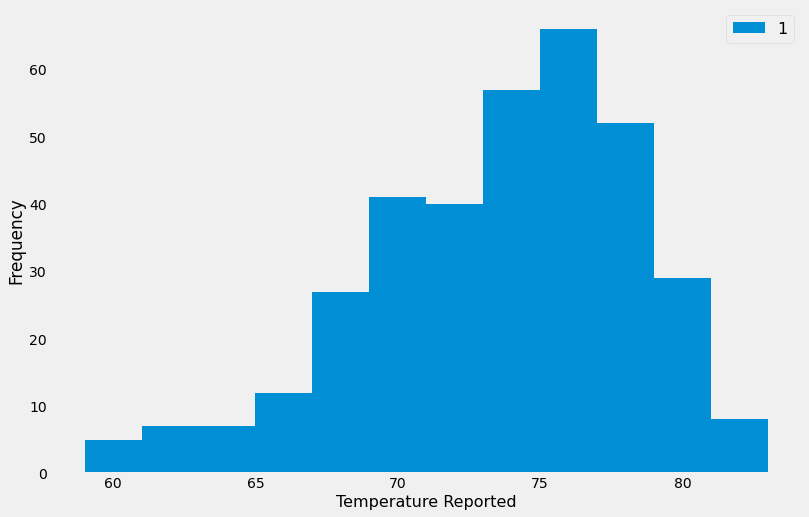

In [99]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = (session.query(Measurement.date, Measurement.tobs)
                   .filter(Measurement.date > one_year_from_last_date)
                   .filter(Measurement.station == most_active_station)
                   .order_by(Measurement.date)
                   .all())

temp_data_df = pd.DataFrame(temp_data)
temp_data_df.head()


# Plot the results as a histogram with bins=12.
temp_data_df.plot.hist(by='station', bins=12, figsize=(12,8))
plt.grid()
plt.xlabel("Temperature Reported", fontsize=16)
plt.legend(bbox_to_anchor=(1,1), fontsize=16)
plt.show

# Close session

In [100]:
# Close Session
session.close()